In [2]:
import pandas as pd
import numpy as np

In [91]:
from sentence_transformers import SentenceTransformer

In [92]:

# Load the multilingual model
multilingual_model = SentenceTransformer('paraphrase-xlm-r-multilingual-v1')
# multilingual_model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')

# Define movie collection names in different languages
movie_collection_names = [
    "Star Wars", # English
    "Alien Nation Collection", # French
    "Звёздные войны", # Russian
    "星球大戰", # Chinese
    "Самый лучший фильм - Коллекция", # Japanese
]

# Convert movie collection names to fixed-size embeddings
embeddings = multilingual_model.encode(movie_collection_names)

print(embeddings)

: 

: 

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity([embeddings[0]], embeddings)

array([[1.        , 0.34524465, 0.9201319 , 0.7227432 , 0.1234644 ]],
      dtype=float32)

In [ ]:
cosine_similarity([embeddings[0]], embeddings)

array([[1.        , 0.34524465, 0.9201319 , 0.7227432 , 0.1234644 ]],
      dtype=float32)

In [ ]:
cosine_similarity([embeddings[0]], embeddings)

array([[1.        , 0.34524465, 0.9201319 , 0.7227432 , 0.1234644 ]],
      dtype=float32)

In [3]:
# read data
df = pd.read_csv('data/train.csv')

In [4]:
def convert_list_of_dict_str_to_list_of_dict(x):
    if isinstance(x, str):
        return eval(x)
    else:
        return []

In [5]:
from sklearn.feature_extraction import DictVectorizer

In [6]:
df['belongs_to_collection'] = df['belongs_to_collection'].apply(convert_list_of_dict_str_to_list_of_dict)

In [7]:
collections = [d[0]['name'] if d else '' for d in df['belongs_to_collection'].tolist()]

In [8]:
embeddings = multilingual_model.encode(collections)

NameError: name 'multilingual_model' is not defined

In [ ]:
embeddings.shape

(3000, 768)

In [9]:
df.drop('belongs_to_collection', axis=1, inplace=True)

In [10]:
df['genres'] = df['genres'].apply(convert_list_of_dict_str_to_list_of_dict)

In [11]:
from collections import Counter

In [12]:
genres = [Counter([o['id'] for o in d])  for d in df['genres']]

In [13]:
genres

[Counter({35: 1}),
 Counter({35: 1, 18: 1, 10751: 1, 10749: 1}),
 Counter({18: 1}),
 Counter({53: 1, 18: 1}),
 Counter({28: 1, 53: 1}),
 Counter({16: 1, 12: 1, 10751: 1}),
 Counter({27: 1, 53: 1}),
 Counter({99: 1}),
 Counter({28: 1, 35: 1, 10402: 1, 10751: 1, 12: 1}),
 Counter({35: 1, 10402: 1}),
 Counter({18: 1}),
 Counter({35: 1}),
 Counter({18: 1}),
 Counter({35: 1, 80: 1}),
 Counter({28: 1, 53: 1, 878: 1, 9648: 1}),
 Counter({28: 1, 80: 1, 18: 1}),
 Counter({27: 1, 53: 1}),
 Counter({18: 1, 10749: 1}),
 Counter({35: 1, 10749: 1}),
 Counter({28: 1, 53: 1, 80: 1}),
 Counter({12: 1, 10751: 1, 878: 1}),
 Counter({27: 1, 53: 1}),
 Counter({53: 1, 27: 1}),
 Counter({53: 1, 9648: 1, 10769: 1}),
 Counter({27: 1, 35: 1}),
 Counter({35: 1, 27: 1, 9648: 1, 53: 1}),
 Counter({80: 1, 18: 1, 9648: 1, 53: 1}),
 Counter({18: 1, 35: 1, 10749: 1}),
 Counter({16: 1}),
 Counter({28: 1, 12: 1, 80: 1, 53: 1}),
 Counter({18: 1, 35: 1}),
 Counter({9648: 1, 18: 1, 53: 1}),
 Counter({14: 1, 28: 1, 12: 1}),

In [14]:
genres_vectorizer = DictVectorizer(dtype=int)

# Fit the vectorizer on the data
genres_vectorizer.fit(genres)

# Convert the data to a BoW representation
bow = genres_vectorizer.transform(genres).toarray()

# Print the resulting BoW representation
print(bow)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [15]:
bow.shape

(3000, 20)

In [16]:
bow[1]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [17]:
original_language = df['original_language'].values

In [18]:
original_language = original_language.reshape(-1, 1)

In [19]:
original_language.shape

(3000, 1)

In [20]:
from sklearn.preprocessing import OneHotEncoder

In [21]:
ohe = OneHotEncoder(min_frequency=.005, sparse_output=False).fit(original_language)

In [22]:
ohe.transform(original_language).shape

(3000, 13)

In [23]:
ohe.get_feature_names_out()

array(['x0_cn', 'x0_de', 'x0_en', 'x0_es', 'x0_fr', 'x0_hi', 'x0_it',
       'x0_ja', 'x0_ko', 'x0_ru', 'x0_ta', 'x0_zh',
       'x0_infrequent_sklearn'], dtype=object)

In [24]:
# fill na with empty string
df['overview'] = df['overview'].fillna('')

In [25]:
maximum = 0
for o in df['overview']:
    try:
        maximum = max(maximum, len(o.split()))
    except:
        print(o)
        0/0
    

<Axes: >

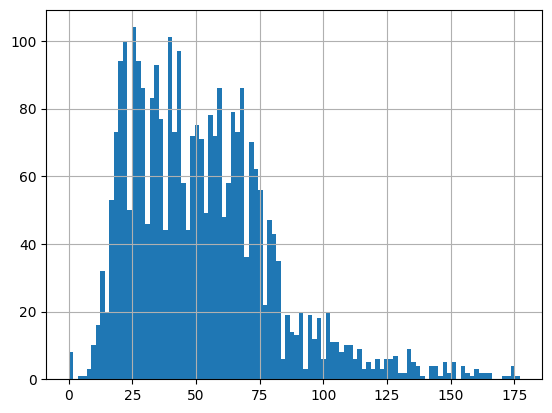

In [26]:
# plot the distribution of the length of the overview 
df['overview'].apply(lambda x: len(x.split())).hist(bins=100)

<Axes: >

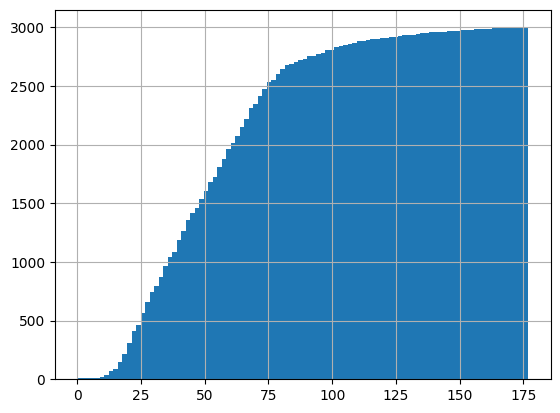

In [27]:
# plot the cumulative distribution of the length of the overview
df['overview'].apply(lambda x: len(x.split())).hist(bins=100, cumulative=True)

In [28]:
maximum

177

In [29]:
# import re
# def is_english(text):
#     # Remove all non-English characters and punctuation
#     text = re.sub('[^a-zA-Z.,!?;:'\"]', '', text)
#     # Check if the remaining text is empty or not
#     return len(text) == 0

from langdetect import detect
def is_english(text):
    # Detect the language of the text
    lang = detect(text)
    # Check if the detected language is English or not
    return lang == 'en'

In [30]:
def is_english_string(vs):
    counter = 20
    for s in vs:
        if not is_english(s):
        # for c in s:
            # if not (c.isalpha() or c.isspace() ):
            #     print(s, c)
            counter -= 1
            print(s)
            if counter == 0:
                0/0
            

In [31]:
is_english_string(df['overview'])

ROB ZOMBIE'S  S P O O K  H A U S 31
Артем Колчин был одним из многих, но он хотел славы. И он выбрал свой путь: он стал боксером. Теперь Артем претендент на чемпионский титул, боец, известный по всему миру, Большая Белая Надежда. Но главный бой в его жизни пошел не так, как он ожидал. Теперь ему предстоит решать свои проблемы вне ринга. У него всего три дня, чтобы расквитаться с теми, кто его предал, защитить любимую женщину от наемных убийц и собрать огромную сумму денег. В реальном мире бьют без перчаток и без правил. Вместо ринга — злые улицы большого города. И нет рефери, который может остановить бой. Но боец остается бойцом. Он знает, что такое страх, но способен не бояться. Он продолжает биться, даже когда надежда умерла. Счет идет на часы. И Артем начинает бой. За любовь. За друзей. За собственную жизнь.
Dans le quartier du Sentier, Eddie Vuibert, Dov et Yvan sont confrontés aux procédés pour le moins expéditifs de leur nouveau client, Eurodiscount, une chaîne européenne d'hyper

LangDetectException: No features in text.

In [32]:
country_codes = ['CN', 'US', 'KR', 'IN', 'GB', 'FR', 'DE', 'ES', 'RU', 'AU', 'CA', 'MX', 'BR']

In [33]:
country_codes_all = country_codes.copy()

In [34]:
country_codes = ['CN', 'IN', 'US']
# , 'ID', 'BR', 'PK', 'NG', 'BD', 'RU', 'JP', 'MX', 'PH', 'VN', 'ET', 'EG', 'DE', 'TR', 'FR', 'TH', 'GB', 'IT', 'KR', 'ZA', 'CO', 'AR', 'UA', 'PL', 'CA', 'MA', 'UZ', 'SA', 'PE', 'MY', 'MZ'


In [35]:
import holidays
def check_if_is_holiday(dt, country_code):
    # if country_code == 'IN' and dt.year <= 2001:
    #     return False
    return dt.date() in holidays.CountryHoliday(country_code)

In [36]:
def check_if_is_holiday_in_large_countries(dt):
    return any(check_if_is_holiday(dt, country_code) for country_code in country_codes)

In [37]:
holidays.HolidayBase()

)

In [38]:
from datetime import timedelta

In [39]:
# change date into day, month, year, weekday
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
df["release_date"] = df["release_date"].apply(lambda x: x - timedelta(days=365*100) if x.year > 2019 else x)


In [40]:

df['release_day'] = df['release_date'].dt.day
df['release_month'] = df['release_date'].dt.month
df['release_year'] = df['release_date'].dt.year
df['release_weekday'] = df['release_date'].dt.weekday



In [41]:
df['release_date'].sort_values()

1763   1921-02-15
2992   1924-04-12
1917   1925-09-20
1361   1926-01-18
2680   1926-06-08
          ...    
2838   2017-06-23
1695   2017-06-28
1354   2017-06-29
1715   2017-07-11
2623   2017-07-20
Name: release_date, Length: 3000, dtype: datetime64[ns]

In [42]:
check_if_is_holiday_in_large_countries(df['release_date'][0])

True

In [43]:
# import partial
from functools import partial
check_if_is_holiday_in_us = partial(check_if_is_holiday, country_code='US')

In [44]:
df['release_day_is_holiday-us'] = df['release_date'].apply(check_if_is_holiday_in_us)

In [48]:
for i in range(len(country_codes)):
    country_codes = country_codes_all.copy()
    del country_codes[i]
    try:
        df['release_day_is_holiday'] = df['release_date'].apply(check_if_is_holiday_in_large_countries)
        print("OK", country_codes, country_codes_all[i])
        break
    except:
        print(country_codes)
        


/home/codespace/.python/current/lib/python3.10/site-packages/holidays/countries/india.py:166: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)


['US', 'JP', 'KR', 'GB', 'FR', 'DE', 'ES', 'RU', 'AU', 'CA', 'MX', 'BR', 'IN']


/home/codespace/.python/current/lib/python3.10/site-packages/holidays/countries/india.py:166: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)


['CN', 'JP', 'KR', 'GB', 'FR', 'DE', 'ES', 'RU', 'AU', 'CA', 'MX', 'BR', 'IN']


/home/codespace/.python/current/lib/python3.10/site-packages/holidays/countries/india.py:166: Warning: Diwali and Holi holidays available from 2001 to 2030 only
  warnings.warn(warning_msg, Warning)


OK ['CN', 'US', 'KR', 'GB', 'FR', 'DE', 'ES', 'RU', 'AU', 'CA', 'MX', 'BR', 'IN'] JP


In [56]:
# plot the correlation between is holiday and revenue
df['release_day_is_holiday-us'].astype(int).corr(df['revenue'])

-0.026749212176955497

In [50]:
from datetime import date

In [51]:
dt1 = date(2023, 1, 1)

In [52]:
check_if_is_holiday(dt1)

TypeError: check_if_is_holiday() missing 1 required positional argument: 'country_code'

In [ ]:
import holidays

# Example date and country code
dt = date(2023, 1, 1)
country_code = 'US'

# Get the list of holidays for the country and date
holiday_list = holidays.CountryHoliday(country_code)[dt]

# Print the list of holidays
print(holiday_list)

New Year's Day


In [ ]:
df['release_date']

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
2995   1994-04-22
2996   2013-03-28
2997   1996-10-11
2998   2004-01-16
2999   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]

In [ ]:
df.iloc[1832   ]

id                                                                     1833
budget                                                              1250000
genres                    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
homepage                                                                NaN
imdb_id                                                           tt0070849
original_language                                                        fr
original_title                                        Ultimo tango a Parigi
overview                  A young Parisian woman begins a sordid affair ...
popularity                                                         12.74564
poster_path                                /6ppSHkDe7CoxyvFEc6JILuKnAu0.jpg
production_companies      [{'name': 'United Artists', 'id': 60}, {'name'...
production_countries      [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...
release_date                                            2072-10-14 00:00:00
runtime     

In [64]:
df['status'].unique()

array(['Released', 'Rumored'], dtype=object)

In [66]:
status_encoder = OneHotEncoder(min_frequency=.005, sparse_output=False).fit(df['status'].values.reshape(-1, 1))

In [68]:
status_encoder.transform(df['status'].values.reshape(-1, 1)).sum(axis=0)

array([2996.,    4.])

In [ ]:
distinct_values = get_distinct_value(df['genres'], 'name')
distinct_values, len(distinct_values)

In [ ]:
df

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,title,Keywords,cast,crew,revenue,release_day,release_month,release_year,release_weekday,release_day_is_holiday
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,20,2,2015,4,[]
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,6,8,2004,4,[]
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,10,10,2014,4,[]
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,9,3,2012,4,[]
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5,2,2009,3,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,22,4,1994,4,[]
2996,2997,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,...,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590,28,3,2013,3,[]
2997,2998,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,...,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,11,10,1996,4,[]
2998,2999,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,/nIY4kvJTTnxoBR0wycrXng5MOYs.jpg,...,Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386,16,1,2004,4,[]
